Step 1: Import Libraries

In [10]:
# Import required libraries for data handling, visualization, and model building
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Step 2: Load the dataset

In [11]:
# Load dataset and display first 5 rows
df = pd.read_csv(r"D:\Machine Learning Dataset\Advertising.csv")
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (200, 5)


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Step 3: Exploratory Data Analysis (Graphs)

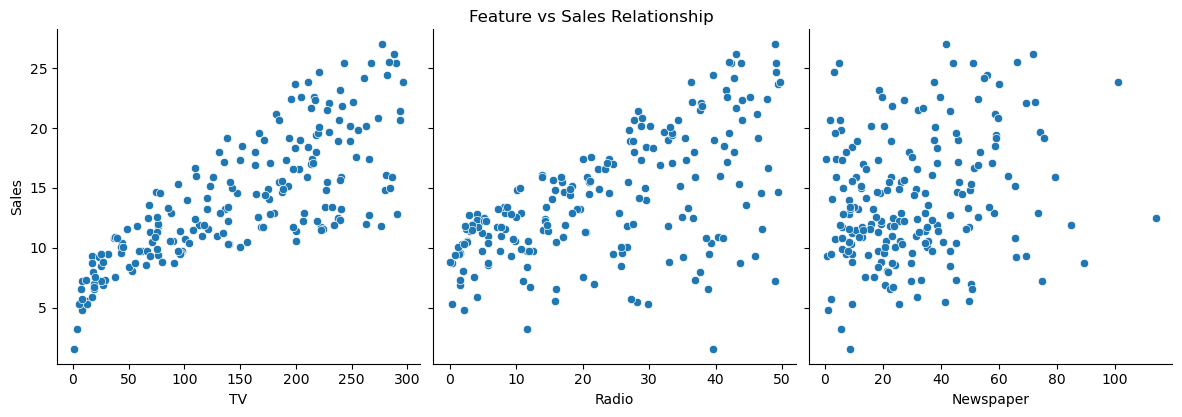

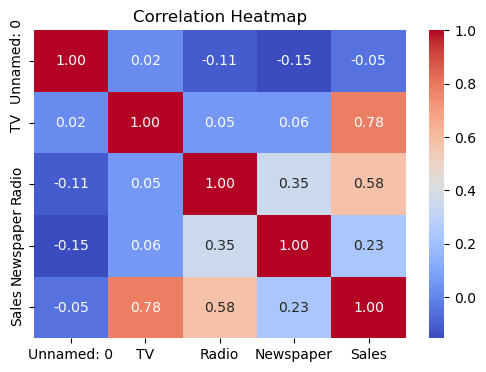

In [12]:
# This cell plots pairwise relationships between features and Sales
# It helps us understand which features are strongly correlated with Sales.

sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", height=4, aspect=1, kind="scatter")
plt.suptitle("Feature vs Sales Relationship", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Step 4: Select Features and Target

In [13]:
# Select 3 features (TV, Radio, Newspaper) as input and Sales as output
X = df[["TV", "Radio", "Newspaper"]]   
y = df["Sales"]


Step 5: Split Data into Train and Test

In [14]:
# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)


Training data size: (160, 3)
Testing data size: (40, 3)


Step 6: Train Linear Regression Model

In [15]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete.")


Model training complete.


Step 7: Predict on Test Data

In [16]:
# Predict Sales values for test dataset
y_pred = model.predict(X_test)

# Compare first 10 actual vs predicted values
comparison = pd.DataFrame({"Actual": y_test[:10].values, "Predicted": y_pred[:10]})
print(comparison)


   Actual  Predicted
0    16.9  16.408024
1    22.4  20.889882
2    21.4  21.553843
3     7.3  10.608503
4    24.7  22.112373
5    12.6  13.105592
6    22.3  21.057192
7     8.4   7.461010
8    11.5  13.606346
9    14.9  15.155070


Step 8: Validate Model Performance

In [17]:
# Evaluate model with MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 3.1740973539761046
R² Score: 0.899438024100912


Step 9: Visualize Actual vs Predicted

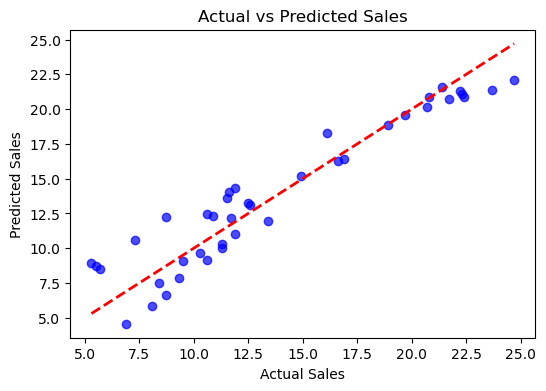

In [18]:
# Scatter plot for Actual vs Predicted values
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color="blue", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


Step 10: Model Coefficients

In [8]:
# Display model intercept and coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Visualize feature importance
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

plt.figure(figsize=(6,4))
sns.barplot(x="Feature", y="Coefficient", data=coef_df, palette="viridis")
plt.title("Feature Importance in Predicting Sales")
plt.show()


Intercept: 2.979067338122629
Coefficients: [0.04472952 0.18919505 0.00276111]
